In [1]:
# Solvers
from modules.tp2 import createGraphFromFile, twiceAroundTheTree, christofides
from modules.bnb import branchAndBound

# Profiling
from memory_profiler import memory_usage
from functools import partial
import time
import json

# Analysis
import matplotlib.pyplot as plt

In [2]:
def getOptimalFromFile():
    file = open('./tp2_datasets.txt', 'r')

    sols = {}

    for line in file.readlines():
        name, nodes, opt = line.split()
        sols[name] = {'opt': int(opt), 'nodes': int(nodes)}
    
    return sols

optimals = getOptimalFromFile()

In [3]:
def testInstance(test, optimals):
    filename = './datasets/' + test + '.tsp'

    result = {}
    result['tat'] = {}
    result['chr'] = {}
    result['bnb'] = {}
    
    # Timeout in seconds
    timeout = 1800 # 30 minutes
    max_nodes = 64

    # Get graph 
    G = createGraphFromFile(filename)

    # TAT
    startTime = time.time()
    mem, dist = memory_usage(partial(twiceAroundTheTree, G), 
                             interval=0.1, 
                             max_usage=True, 
                             retval=True)
    endTime = time.time()

    result['tat']['time']    = endTime - startTime
    result['tat']['max_mem'] = mem
    result['tat']['result']  = dist
    result['tat']['ratio']   = dist / optimals[test]['opt']
    print("- finished TAT")

    # CHR
    startTime = time.time()
    mem, dist = memory_usage(partial(christofides, G), 
                             interval=0.1, 
                             max_usage=True, 
                             retval=True)
    endTime = time.time()

    result['chr']['time']    = endTime - startTime
    result['chr']['max_mem'] = mem
    result['chr']['result']  = dist
    result['chr']['ratio']   = dist / optimals[test]['opt']
    print("- finished CHR")

    # BNB
    try:
        if optimals[test]['nodes'] > max_nodes: raise Exception

        # Check if memory exception will occur
        branchAndBound(dist, filename, timeout)
    except Exception:
        result['bnb']['time']    = 'NA'
        result['bnb']['max_mem'] = 'OUT OF MEMORY'
        result['bnb']['result']  = 'NA'
        result['bnb']['ratio']   = 'NA'
        print("- finished BNB")

        return result

    # Memory is not an issue
    mem, dist = memory_usage(partial(branchAndBound, dist, filename, timeout), 
                                interval=0.1, 
                                max_usage=True, 
                                retval=True)
        
    result['bnb']['time']    = timeout
    result['bnb']['max_mem'] = mem
    result['bnb']['result']  = dist
    result['bnb']['ratio']   = dist / optimals[test]['opt']
    print("- finished BNB")

    return result

In [ ]:
# Run tests
results = {}

idx = 1
start = 1
end = 73

# Run every test instance
for test, _ in optimals.items():
    if idx < start:
        idx += 1
        continue

    if idx > end: 
        break

    print(f"{idx}/78 testing {test}")
    
    results[test] = testInstance(test, optimals)

    print()
    idx += 1

# Save results
pretty = json.dumps(results, indent=4)

with open('./results1-73.json', 'w') as f:
    f.write(pretty)

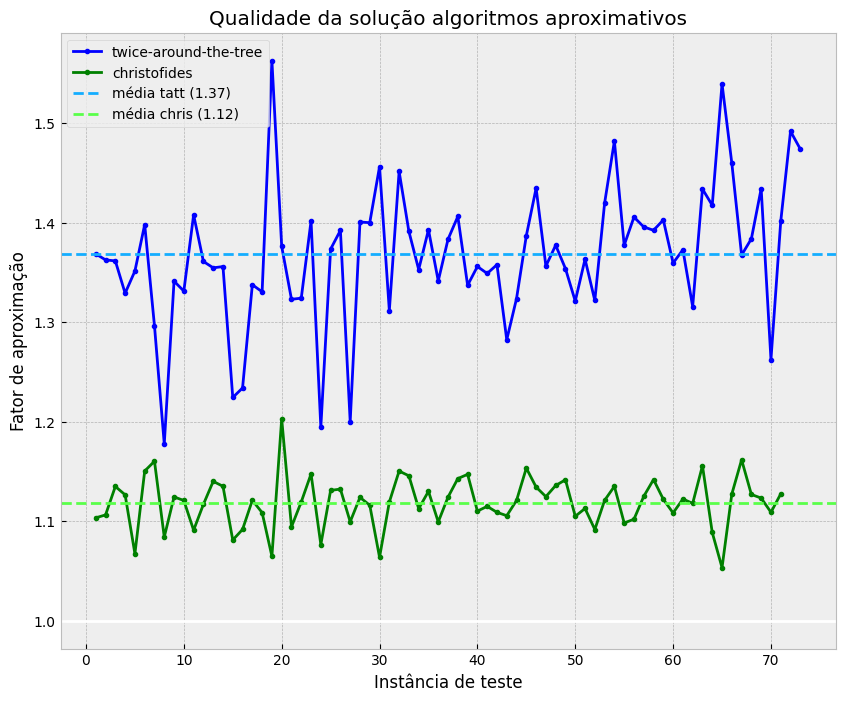

In [79]:
# Generate graphs and stuff
result = json.load(open('./results1-73.json', 'r'))

instances = [i for i in range(1, 74)][:]

tat = [v['tat']['ratio'] for v in result.values()][:]
chr = [v['chr']['ratio'] for v in result.values() if type(v['chr']['time']) is float][:]

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

plt.plot(instances, tat, marker='.', linestyle='-', label='twice-around-the-tree', color='blue')
plt.plot(instances[:-2], chr, marker='.', linestyle='-', label='christofides', color='green')

tat_avg = sum(tat) / len(tat)
chr_avg = sum(chr) / len(chr)

plt.axhline(tat_avg, color='#14adff', linestyle='--', label=f"média tatt ({tat_avg:.2f})")
plt.axhline(chr_avg, color='#59ff4a', linestyle='--', label=f"média chris ({chr_avg:.2f})")

plt.axhline(1.0, color='#ffffff')

plt.xlabel('Instância de teste')
plt.ylabel('Fator de aproximação')
plt.title('Qualidade da solução algoritmos aproximativos')
plt.legend()

plt.show()

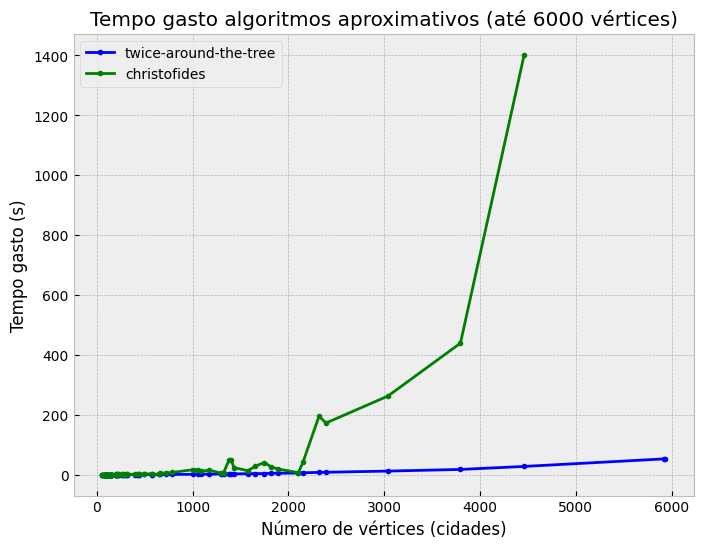

In [85]:
instances = [i for i in range(1, 74)][:]
instances = [v['nodes'] for v in optimals.values()][:-5]

tat = [v['tat']['time'] for v in result.values()][:]
chr = [v['chr']['time'] for v in result.values() if type(v['chr']['time']) is float][:]

plt.style.use('bmh')
plt.figure(figsize=(8, 6))

plt.plot(instances, tat, marker='.', linestyle='-', label='twice-around-the-tree', color='blue')
plt.plot(instances[:-2], chr, marker='.', linestyle='-', label='christofides', color='green')

plt.xlabel('Número de vértices (cidades)')
plt.ylabel('Tempo gasto (s)')
plt.title('Tempo gasto algoritmos aproximativos (até 6000 vértices)')
plt.legend()

plt.show()

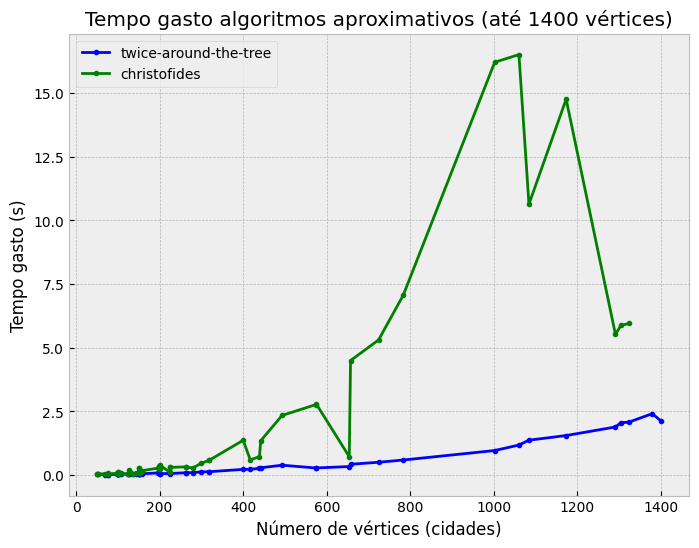

In [84]:
instances = [i for i in range(1, 74)][:]
instances = [v['nodes'] for v in optimals.values()][:-20]

tat = [v['tat']['time'] for v in result.values()][:-15]
chr = [v['chr']['time'] for v in result.values() if type(v['chr']['time']) is float][:-15]

plt.style.use('bmh')
plt.figure(figsize=(8, 6))

plt.plot(instances, tat, marker='.', linestyle='-', label='twice-around-the-tree', color='blue')
plt.plot(instances[:-2], chr, marker='.', linestyle='-', label='christofides', color='green')

plt.xlabel('Número de vértices (cidades)')
plt.ylabel('Tempo gasto (s)')
plt.title('Tempo gasto algoritmos aproximativos (até 1400 vértices)')
plt.legend()

plt.show()

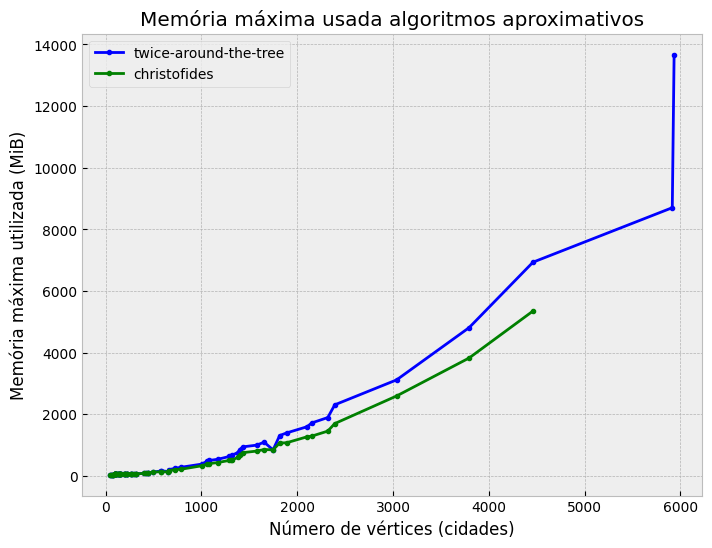

In [77]:
instances = [i for i in range(1, 74)][:]
instances = [v['nodes'] for v in optimals.values()][:-5]

tat = [v['tat']['max_mem'] for v in result.values()][:]
chr = [v['chr']['max_mem'] for v in result.values() if type(v['chr']['time']) is float][:]

plt.style.use('bmh')
plt.figure(figsize=(8, 6))

plt.plot(instances, tat, marker='.', linestyle='-', label='twice-around-the-tree', color='blue')
plt.plot(instances[:-2], chr, marker='.', linestyle='-', label='christofides', color='green')

plt.xlabel('Número de vértices (cidades)')
plt.ylabel('Memória máxima utilizada (MiB)')
plt.title('Memória máxima usada algoritmos aproximativos')
plt.legend()

plt.show()